In [1]:
import warnings
warnings.filterwarnings('ignore')

#### Exploración del efecto de hiperparámetros

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

#### Cargar datos desde el práctico anterior

In [3]:
df_data = pd.read_csv("data_practico1/train_data_scaled_robust.csv")
response = np.load("data_practico1/y_train.npy")

##### Hiperparámetros KNN

- **n_neighbors** (`int`): Número de vecinos (default=`5`)

- **weights**: Método para la ponderación de las contribuciones de los vecinos (default=`uniforme`)
  - **Valores**:
    - `uniforme`: Todos los puntos de cada vecindario tienen la misma ponderación.
    - `distancia`: Los vecinos más cercanos a un punto de consulta tendrán mayor influencia que los vecinos más lejanos.
    - `callable`: Función definida por el usuario.

- **algorithm**: Algoritmo utilizado para calcular los vecinos más cercanos (default=`auto`)
  - **Valores**: `{'auto', 'ball_tree', 'kd_tree', 'brute'}`

- **leaf_size** (`int`): Tamaño de hoja que se pasa a `BallTree` o `KDTree` (default=`30`)

- **p** (`int`): Parámetro de potencia para la métrica de Minkowski (default=`2`)
  - **Valores**:
    1. `1`: Distancia Manhattan.
    2. `2`: Distancia Euclideana.
    3. `3`: Distancia Minkowski.

- **metric**: Métrica para calcular la distancia (default=`minkowski`)

- **n_jobs** (`int`): Número de trabajos paralelos para la búsqueda de vecinos (default=`None`)

In [4]:
n_neighbors_values = [3, 5, 7, 9]  # Número de vecinos
weights_values = ['uniform', 'distance']  # Tipo de ponderación
metrics_values = ['euclidean', 'manhattan']  # Tipos de distancia

scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

results = []

for n in n_neighbors_values:
    for weight in weights_values:
        for metric in metrics_values:
            print(f"Entrenando KNN con n_neighbors={n}, weights={weight}, metric={metric}")
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=weight, metric=metric) # Entrenar modelos
            
            scores = cross_validate(knn_model, X=df_data, y=response, cv=10, scoring=scoring, return_train_score=True)
            
            # Promedios en el conjunto de entrenamiento
            avg_train_accuracy = np.mean(scores['train_accuracy'])
            avg_train_recall = np.mean(scores['train_recall'])
            avg_train_precision = np.mean(scores['train_precision'])
            avg_train_f1 = np.mean(scores['train_f1'])
            
            # Promedios en el conjunto de testeo
            avg_test_accuracy = np.mean(scores['test_accuracy'])
            avg_test_recall = np.mean(scores['test_recall'])
            avg_test_precision = np.mean(scores['test_precision'])
            avg_test_f1 = np.mean(scores['test_f1'])
            
            results.append({
                'n_neighbors': n,
                'weights': weight,
                'metric': metric,
                'Train accuracy': avg_train_accuracy,
                'Train recall': avg_train_recall,
                'Train precision': avg_train_precision,
                'Train F1-score': avg_train_f1,
                'Test accuracy': avg_test_accuracy,
                'Test recall': avg_test_recall,
                'Test precision': avg_test_precision,
                'Test F1-score': avg_test_f1
            })

results_knn = pd.DataFrame(results)

Entrenando KNN con n_neighbors=3, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=3, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=3, weights=distance, metric=euclidean
Entrenando KNN con n_neighbors=3, weights=distance, metric=manhattan
Entrenando KNN con n_neighbors=5, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=5, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=5, weights=distance, metric=euclidean
Entrenando KNN con n_neighbors=5, weights=distance, metric=manhattan
Entrenando KNN con n_neighbors=7, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=7, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=7, weights=distance, metric=euclidean
Entrenando KNN con n_neighbors=7, weights=distance, metric=manhattan
Entrenando KNN con n_neighbors=9, weights=uniform, metric=euclidean
Entrenando KNN con n_neighbors=9, weights=uniform, metric=manhattan
Entrenando KNN con n_neighbors=9, weights=

In [5]:
results_knn

,n_neighbors,weights,metric,Train accuracy,Train recall,Train precision,Train F1-score,Test accuracy,Test recall,Test precision,Test F1-score
0,3,uniform,euclidean,0.762788,0.568998,0.714544,0.633506,0.551686,0.276314,0.347081,0.307464
1,3,uniform,manhattan,0.757557,0.559955,0.706368,0.624680,0.543278,0.262217,0.331007,0.292509
2,3,distance,euclidean,1.000000,1.000000,1.000000,1.000000,0.551686,0.276314,0.347081,0.307464
3,3,distance,manhattan,1.000000,1.000000,1.000000,1.000000,0.543278,0.262217,0.331007,0.292509
4,5,uniform,euclidean,0.711266,0.432420,0.649187,0.519045,0.562143,0.229685,0.339891,0.273885
5,5,uniform,manhattan,0.704203,0.428752,0.632003,0.510877,0.549617,0.225707,0.323548,0.265362
6,5,distance,euclidean,1.000000,1.000000,1.000000,1.000000,0.562143,0.229685,0.339891,0.273885
7,5,distance,manhattan,1.000000,1.000000,1.000000,1.000000,0.549934,0.226148,0.324138,0.265861
8,7,uniform,euclidean,0.678768,0.337684,0.595745,0.431010,0.567693,0.189190,0.327776,0.239643
9,7,uniform,manhattan,0.675562,0.341595,0.585366,0.431413,0.561036,0.189622,0.319018,0.237575


##### Hiperparámetros GradientBoosting

- **loss**: Función de pérdida a optimizar (default=`'log_loss'`).
    - **Valores**: {`log_loss`, `exponencial`}. 
        - `log_loss`: Binomial o multinomial. 
        - `exponencial`: la optimización del modelo se comportará de manera similar a AdaBoost
  
- **learning_rate**: Tasa de aprendizaje para actualizar los pesos en cada iteración (default=`0.1`). Contribución de cada nuevo árbol que se añade al modelo

- **n_estimators**: Número de estimadores (árboles) a utilizar (default=`100`).
  
- **subsample**: Fracción de muestras a utilizar para ajustar cada árbol (default=`1.0`).
  
- **criterion**: Criterio para la función de pérdida (default=`'friedman_mse'`).
    - **Valores**: {‘friedman_mse’, ‘squared_error’}
  
- **min_samples_split**: Número mínimo de muestras necesarias para dividir un nodo (default=`2`).
  
- **min_samples_leaf**: Número mínimo de muestras en un nodo hoja (default=`1`).
  
- **min_weight_fraction_leaf**: Fracción mínima de peso requerida en un nodo hoja (default=`0.0`).
  
- **max_depth**: Profundidad máxima de los árboles (default=`3`).
  
- **min_impurity_decrease**: Umbral de disminución de impurezas para dividir un nodo (default=`0.0`).
  
- **init**: Estimador inicial para la predicción (default=`None`).
  
- **random_state** (`int` o `None`): Controla la aleatoriedad del muestreo y del modelo (default=`None`).
  
- **max_features** (`int`, `float`, o `None`): Número de características a considerar para buscar la mejor división (default=`None`).
  
- **verbose**: Controla el nivel de mensajes de salida (default=`0`).
  
- **max_leaf_nodes** (`int` o `None`): Número máximo de nodos hoja (default=`None`).
  
- **warm_start**: Si se deben reutilizar las soluciones anteriores para ajustarlas (default=`False`).
  
- **validation_fraction**: Fracción de muestras utilizadas para la validación en la parada temprana (default=`0.1`).
  
- **n_iter_no_change** (`int` o `None`): Número de iteraciones sin cambio en la validación para detener el entrenamiento (default=`None`).
  
- **tol**: Tolerancia para la parada temprana (default=`0.0001`).
  
- **ccp_alpha**: Parámetro de complejidad para la poda de costo-complejidad (default=`0.0`).


In [6]:
n_estimators_values = [50, 100, 150]  # Número de estimadores
learning_rate_values = [0.01, 0.1, 0.2]  # Tasa de aprendizaje
max_depth_values = [3, 4, 5]  # Profundidad máxima de los árboles

scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall',
    'precision': 'precision',
    'f1': 'f1'
}

results = []

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        for max_depth in max_depth_values:
            print(f"Entrenando Gradient Boosting con n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}")
            gb_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
            
            scores = cross_validate(gb_model, X=df_data, y=response, cv=10, scoring=scoring, return_train_score=True)
            
            # Promedios en el conjunto de entrenamiento
            avg_train_accuracy = np.mean(scores['train_accuracy'])
            avg_train_recall = np.mean(scores['train_recall'])
            avg_train_precision = np.mean(scores['train_precision'])
            avg_train_f1 = np.mean(scores['train_f1'])
            
            # Promedios en el conjunto de testeo
            avg_test_accuracy = np.mean(scores['test_accuracy'])
            avg_test_recall = np.mean(scores['test_recall'])
            avg_test_precision = np.mean(scores['test_precision'])
            avg_test_f1 = np.mean(scores['test_f1'])
            
            results.append({
                'n_estimators': n_estimators,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'Train accuracy': avg_train_accuracy,
                'Train recall': avg_train_recall,
                'Train precision': avg_train_precision,
                'Train F1-score': avg_train_f1,
                'Test accuracy': avg_test_accuracy,
                'Test recall': avg_test_recall,
                'Test precision': avg_test_precision,
                'Test F1-score': avg_test_f1
            })

results_gradient_boosting = pd.DataFrame(results)

Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.01, max_depth=3
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.01, max_depth=4
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.01, max_depth=5
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.1, max_depth=3
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.1, max_depth=4
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.1, max_depth=5
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.2, max_depth=3
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.2, max_depth=4
Entrenando Gradient Boosting con n_estimators=50, learning_rate=0.2, max_depth=5
Entrenando Gradient Boosting con n_estimators=100, learning_rate=0.01, max_depth=3
Entrenando Gradient Boosting con n_estimators=100, learning_rate=0.01, max_depth=4
Entrenando Gradient Boosting con n_estimators=100, learning_rate=0.01, max_depth=5
Entrenando Gradient

In [7]:
results_gradient_boosting

,n_estimators,learning_rate,max_depth,Train accuracy,Train recall,Train precision,Train F1-score,Test accuracy,Test recall,Test precision,Test F1-score
0,50,0.01,3,0.639682,0.000049,0.100000,0.000098,0.639664,0.000000,0.000000,0.000000
1,50,0.01,4,0.639893,0.000636,0.400000,0.001269,0.639664,0.000000,0.000000,0.000000
2,50,0.01,5,0.640386,0.002005,0.700000,0.003989,0.639505,0.000000,0.000000,0.000000
3,50,0.10,3,0.647996,0.024099,0.966108,0.046946,0.636493,0.005281,0.232738,0.010290
4,50,0.10,4,0.667565,0.078214,0.990522,0.144719,0.633482,0.014520,0.314683,0.027526
5,50,0.10,5,0.703727,0.179108,0.993016,0.302779,0.625399,0.027720,0.283750,0.050272
6,50,0.20,3,0.671898,0.097668,0.923528,0.176461,0.625395,0.023760,0.273854,0.043583
7,50,0.20,4,0.719580,0.231215,0.961107,0.372484,0.620641,0.058523,0.338584,0.099406
8,50,0.20,5,0.790478,0.426698,0.981193,0.594417,0.607799,0.083588,0.326008,0.132742
9,100,0.01,3,0.640122,0.001271,0.700000,0.002536,0.639664,0.000441,0.050000,0.000873


### Análisis de resultados

#### Test estadistico para KNN
Si p-value es pequeño (generalmente < 0.05), indica que hay una diferencia significativa en el rendimiento entre las configuraciones de hiperparámetros.

In [8]:
from scipy.stats import f_oneway

# Comparar accuracy entre diferentes configuraciones de n_neighbors
accuracy_3_neighbors = results_knn[results_knn['n_neighbors'] == 3]['Test accuracy']
accuracy_5_neighbors = results_knn[results_knn['n_neighbors'] == 5]['Test accuracy']
accuracy_7_neighbors = results_knn[results_knn['n_neighbors'] == 7]['Test accuracy']
accuracy_9_neighbors = results_knn[results_knn['n_neighbors'] == 9]['Test accuracy']

# Prueba ANOVA
f_statistic, p_value = f_oneway(accuracy_3_neighbors, accuracy_5_neighbors, accuracy_7_neighbors, accuracy_9_neighbors)
print(f"F-statistic: {f_statistic}, P-value: {p_value}")

F-statistic: 23.38298453872494, P-value: 2.664772494092521e-05


In [9]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

accuracies = pd.DataFrame({
    'accuracy': pd.concat([accuracy_3_neighbors, accuracy_5_neighbors, accuracy_7_neighbors, accuracy_9_neighbors]),
    'n_neighbors': ['3'] * len(accuracy_3_neighbors) + ['5'] * len(accuracy_5_neighbors) + ['7'] * len(accuracy_7_neighbors) + ['9'] * len(accuracy_9_neighbors)
})

# Test de Tukey
# reject: Indica si se rechaza la hipótesis nula (que no hay diferencia entre los grupos). 
# True: hay una diferencia significativa; 
# False, no hay una diferencia significativa.

tukey_result = pairwise_tukeyhsd(endog=accuracies['accuracy'], groups=accuracies['n_neighbors'], alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      5   0.0085 0.1012 -0.0014 0.0183  False
     3      7    0.017 0.0013  0.0071 0.0268   True
     3      9   0.0265    0.0  0.0166 0.0363   True
     5      7   0.0085 0.1009 -0.0014 0.0183  False
     5      9    0.018 0.0008  0.0081 0.0279   True
     7      9   0.0095 0.0598 -0.0003 0.0194  False
---------------------------------------------------


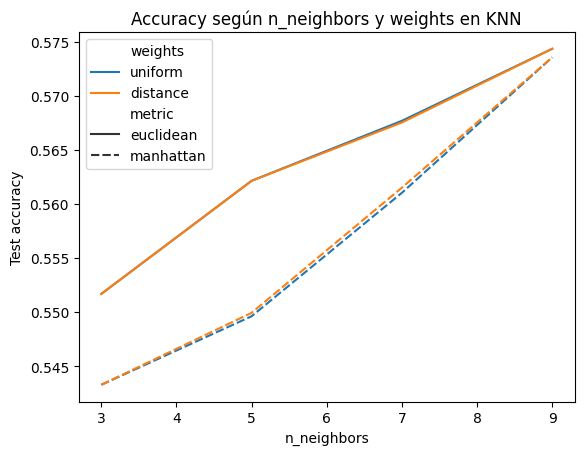

In [10]:
sns.lineplot(data=results_knn, x='n_neighbors', y='Test accuracy', hue='weights', style='metric')
plt.title('Accuracy según n_neighbors y weights en KNN')
plt.show()

#### Test estadistico para gradient boosting
Si p-value es pequeño (generalmente < 0.05), indica que hay una diferencia significativa en el rendimiento entre las configuraciones de hiperparámetros.

In [11]:
from scipy.stats import f_oneway

# Comparar accuracy entre diferentes configuraciones de n_neighbors
accuracy_50_estimators = results_gradient_boosting[results_gradient_boosting['n_estimators'] == 50]['Test accuracy']
accuracy_100_estimators = results_gradient_boosting[results_gradient_boosting['n_estimators'] == 100]['Test accuracy']
accuracy_150_estimators = results_gradient_boosting[results_gradient_boosting['n_estimators'] == 150]['Test accuracy']

# Prueba ANOVA
f_statistic, p_value = f_oneway(accuracy_50_estimators, accuracy_100_estimators, accuracy_150_estimators)
print(f"F-statistic: {f_statistic}, P-value: {p_value}")

F-statistic: 1.5403500004558108, P-value: 0.2347557655593675
